
Задание 1

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?
2) Критикам нравятся больше игры на PC или на PS4?
3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

    сформулируйте нулевую и альтернативную гипотезы;
    выберите пороговый уровень статистической значимости;
    опишите полученные результаты статистического теста.



In [66]:
import pandas as pd
import numpy as np
from scipy import stats as st
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [67]:
import scipy.stats as stats

In [57]:
df = pd.read_csv('statistic/video_games_sales.csv')

In [60]:
df.columns = df.columns.str.lower()
df.head()

,rank,name,basename,genre,esrb_rating,platform,publisher,developer,vgchartz_score,critic_score,...,na_sales,pal_sales,jp_sales,other_sales,year,last_update,url,status,vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [63]:
df_cs = df[np.logical_not(df['critic_score'].isna())]['critic_score']

In [71]:
alpha = 0.05
result = st.ttest_1samp(df_cs, 7.0)

print(df_cs.mean())
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, средняя оценка игр критиками выше 7.0')
else:
    print('Не отвергаем нулевую нулевую гипотезу, средняя оценка игр критиками не выше 7.0')

7.21370869033052
Ttest_1sampResult(statistic=11.882016908955192, pvalue=3.146059976681409e-32)
Отвергаем нулевую гипотезу, средняя оценка игр критиками выше 7.0


1) Как критики относятся к спортивным играм?
Нулевая гипотеза состоит в том, что средняя оценка критиков 7.0 и меньше. p меньше статистической значимости. Значит есть основания отвергнуть нулевую гипотезу.

In [72]:
df_games = pd.read_csv('statistic/video_games_sales.csv')

In [74]:
df_sports = df.loc[(df['genre'] == 'Sports')]

In [76]:
df_sports['critic_score'].fillna(df['critic_score'].median(), inplace=True) #заполнил пустые ячейки  средним значением

C:\Users\CoreI7\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [83]:
df_games['Critic_Score'].fillna(df['critic_score'].median(), inplace=True) #заполнил пустые ячейки  средним значением

In [84]:
t , p  = stats.ttest_ind(df_sports['critic_score'], df_games['Critic_Score'])
t , p

(0.8401047789059691, 0.40085293169596015)

In [85]:
df_games['Critic_Score'].mean()

7.46646114138227

In [86]:
df_sports['critic_score'].mean()

7.472635392829897

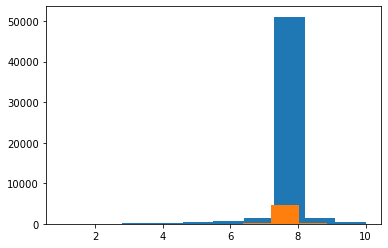

In [87]:
plt.hist(df_games['Critic_Score'], bins=10); 
plt.hist(df_sports['critic_score'], bins=10);  

p больше статистической значимости. Значит нет оснований отвергнуть нулевую гипотезу. Критики относятся к спортивным играм так же как ко всем играм в целом.

2) Критикам нравятся больше игры на PC или на PS4?
Нулевая гипотеза состоит в том, что критикам нравятся игры на pc и ps4 одинаково
Альтернативная гипотеза обратна нулевой. 
Пороговый уровень статистической значимости равен 5%

In [48]:
df_pc = df_games.loc[(df_games['Platform'] == 'PC')]

In [47]:
df_ps4 = df_games.loc[(df_games['Platform'] == 'PS4')]

In [57]:
t , p  = stats.ttest_ind(df_pc['Critic_Score'], df_ps4['Critic_Score'])
t , p

(-2.1553838208451364, 0.031150496372562713)

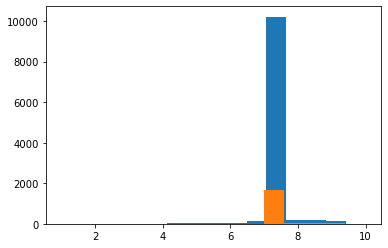

In [60]:
plt.hist(df_pc['Critic_Score'], bins=15); 
plt.hist(df_ps4['Critic_Score'], bins=15); 

p меньше статистической значимости. Значит есть основания отвергнуть нулевую гипотезу. Критикам больше нравитятся игры на PS4. Хотя тут p не сильно отличается от статистической значимости и другой тест может показать значение  p ещё выше. Так же многое решает уровень статистической значимости. Может его стоило брать не 5%, а меньше.

In [ ]:
3) Критикам больше нравятся стрелялки или стратегии?
Нулевая гипотеза состоит в том, что критикам нравятся стрелялки и стратегии одинаково
Альтернативная гипотеза обратна нулевой. 
Пороговый уровень статистической значимости равен 5%

In [73]:
df_Shooter = df_games.loc[(df_games['Genre'] == 'Shooter')]

In [80]:
df_Strategy = df_games.loc[(df_games['Genre'] == 'Strategy')]

In [81]:
t , p  = stats.ttest_ind(df_Shooter['Critic_Score'], df_Strategy['Critic_Score'])
t , p

(-2.360149178663012, 0.01829191250037358)

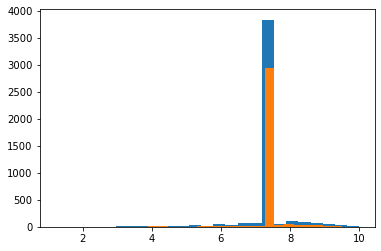

In [83]:
plt.hist(df_Shooter['Critic_Score'], bins=25); 
plt.hist(df_Strategy['Critic_Score'], bins=25); 

In [84]:
df_Shooter['Critic_Score'].mean()

7.460815525512428

In [85]:
df_Strategy['Critic_Score'].mean()

7.492008573178202

p меньше статистической значимости. Значит есть основания отвергнуть нулевую гипотезу. Критикам больше нравитятся стратегии. 


Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;
2) Удалите мусорные символы;
3) Удалите стоп-слова;
4) Привидите все слова к нормальной форме;
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

Можете поэкспериментировать с параметрами TfidfVectorizer;
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
8) Опишите результаты при помощи confusion_matrix;
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).


In [12]:
df_sp = pd.read_csv('spam')  # Откроем датасет
df_sp.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df_sp['Message'] = df_sp.Message.str.lower() #приводим к нижнему регистру
df_sp.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [19]:
import re

In [24]:
reg = r'[\W_]+'

In [38]:
df_spam = df_sp.replace(reg,' ', regex=True) #удаляем мусорные символы
df_spam.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CoreI7\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [40]:
df_spam['Message'] = df_spam['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_spam.head() #удаляем стоп слова                          

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


In [42]:
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [45]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CoreI7\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [43]:
TweetTokenizer = TweetTokenizer()
df_spam['Message'] = df_spam['Message'].apply(TweetTokenizer.tokenize) #разобьём на слова

In [46]:
df_spam['Message'] = df_spam['Message'].apply(
                    lambda lst:[wordnet_lemmatizer.lemmatize(word) for word in lst]) #проведём лемматизацию
df_spam.head()

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, go, usf, life, around, though]"


In [49]:
def to_str(lem):
    return ' '.join([x for x in lem])

In [50]:
df_spam['new_message'] = df_spam['Message'].apply(to_str)
df_spam.head()

,Category,Message,new_message
0,ham,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"[nah, think, go, usf, life, around, though]",nah think go usf life around though


In [52]:
df_spam = df_spam.drop(columns=['Message'])
df_spam.head()

,Category,new_message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_spam.new_message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names) #Преобразуйте все сообщения в вектора TF-IDF

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split

In [91]:
df_spam['class_message'] = (df_spam['Category'] == 'spam') * 1
df_spam.head()

,Category,new_message,class_message
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,u dun say early hor u c already say,0
4,ham,nah think go usf life around though,0


In [94]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df_spam['class_message'], test_size=0.30, random_state=42)

Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

In [95]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [96]:
lda = LinearDiscriminantAnalysis()

In [97]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_test, lda.predict(X_test))

0.97188995215311

 Опишите результаты при помощи confusion_matrix

In [100]:
confusion_matrix(y_test, lda.predict(X_test))

array([[1445,    3],
       [  44,  180]], dtype=int64)

Ошибочно предсказаны 44 и 3 значения

Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного)

In [103]:
df_bad = pd.concat([df_spam[df_spam.index.isin(y_test.index)].reset_index(), 
                    pd.Series(lda.predict(X_test),
                              np.arange(len(lda.predict(X_test))),
                              name = 'predict')],
                    axis=1)
df_bad = df_bad[df_bad['class_message'] != df_bad['predict']]
df_bad

,index,Category,new_message,class_message,predict
0,8,spam,winner valued network customer selected receiv...,1,0
1,12,spam,urgent 1 week free membership 100 000 prize ja...,1,0
2,15,spam,xxxmobilemovieclub use credit click wap link n...,1,0
4,19,spam,england v macedonia dont miss goal team news t...,1,0
14,47,ham,fair enough anything going,0,1
...,...,...,...,...,...
1633,5446,ham,back good journey let know need receipt shall ...,0,1
1634,5450,ham,sac need carry,0,1
1638,5457,ham,arun u transfr amt,0,1
1657,5524,spam,awarded sipix digital camera call 09061221061 ...,1,0
